In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

Загрузка данных и их первичный анализ

In [2]:
df = pd.read_csv('data/adm_data.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


Видим, что нет нулевых значений. Поэтому заменять пока ничего не будем. Повизуализируем

Удалим столбцы, не имеющие смысла

In [5]:
df.drop(columns=['Serial No.'], inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Очень, конечно, хочется узнать, как применяются категориальные признаки... Но, наверное, это будет в следующий занятиях. Пока оставлю их здесь, хотя лучше наверное удалить

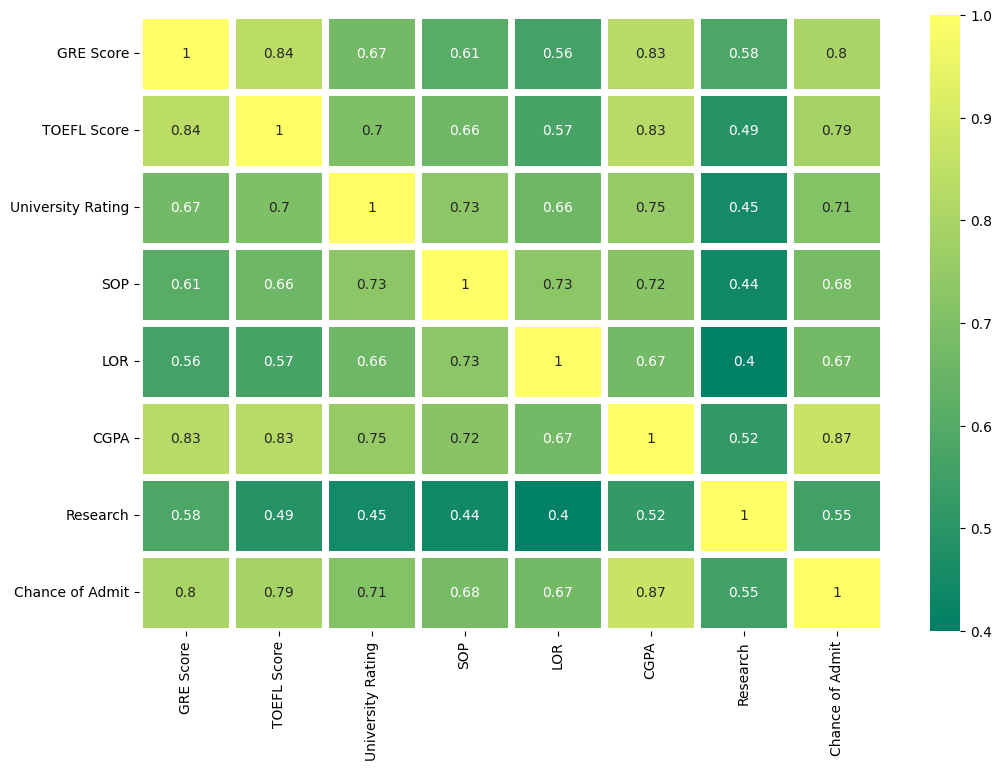

In [6]:
df_corr = df.corr()
df_corr = round(df_corr, 2)
df_corr[np.abs(df_corr) < 0.3] = 0

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, linewidths=5, cmap="summer")
plt.show()

Видим несколько признаков, которые сильно кореллируют с таргетом. 

<Figure size 600x300 with 0 Axes>

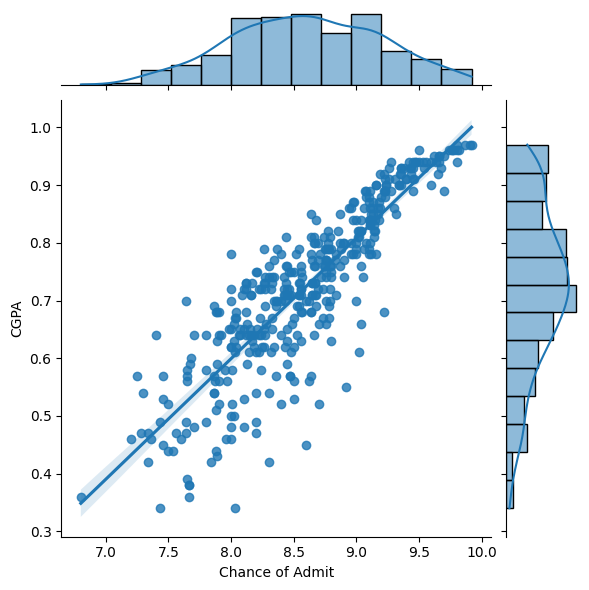

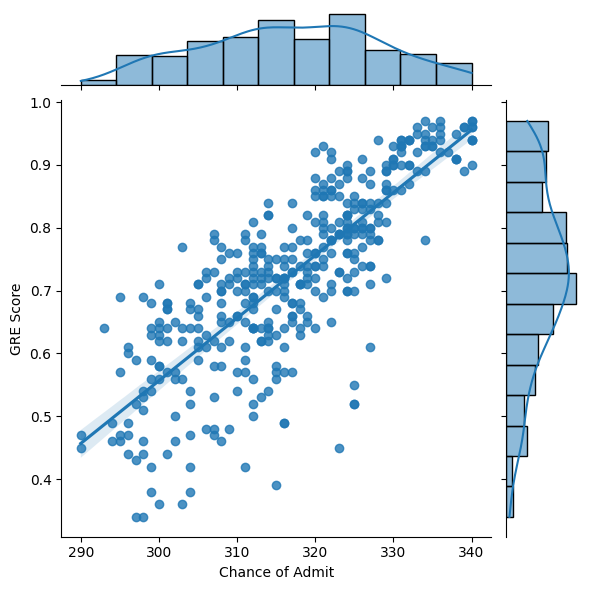

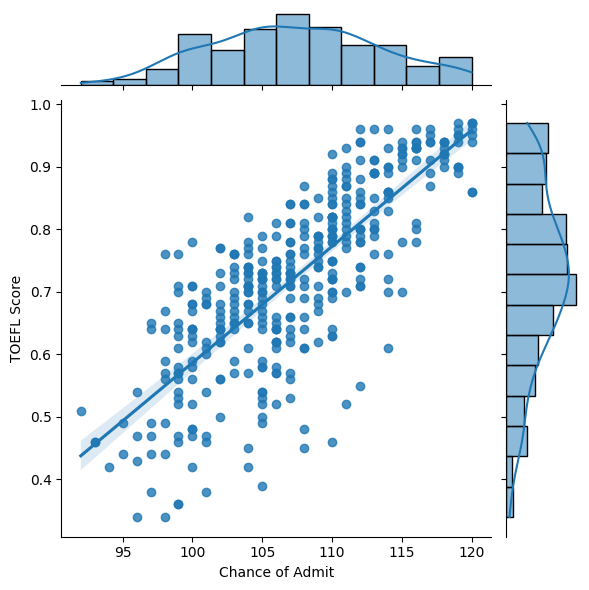

In [7]:
plt.figure(figsize=(6, 3))

grid_1 = sns.jointplot(x=df['CGPA'], y=df['Chance of Admit'], kind='reg')
plt.ylabel("CGPA")
plt.xlabel("Chance of Admit")

grid_2 = sns.jointplot(x=df['GRE Score'], y=df['Chance of Admit'], kind='reg')
plt.ylabel("GRE Score")
plt.xlabel("Chance of Admit")

grid_3 = sns.jointplot(x=df['TOEFL Score'], y=df['Chance of Admit'], kind='reg')
plt.ylabel("TOEFL Score")
plt.xlabel("Chance of Admit")

plt.show()

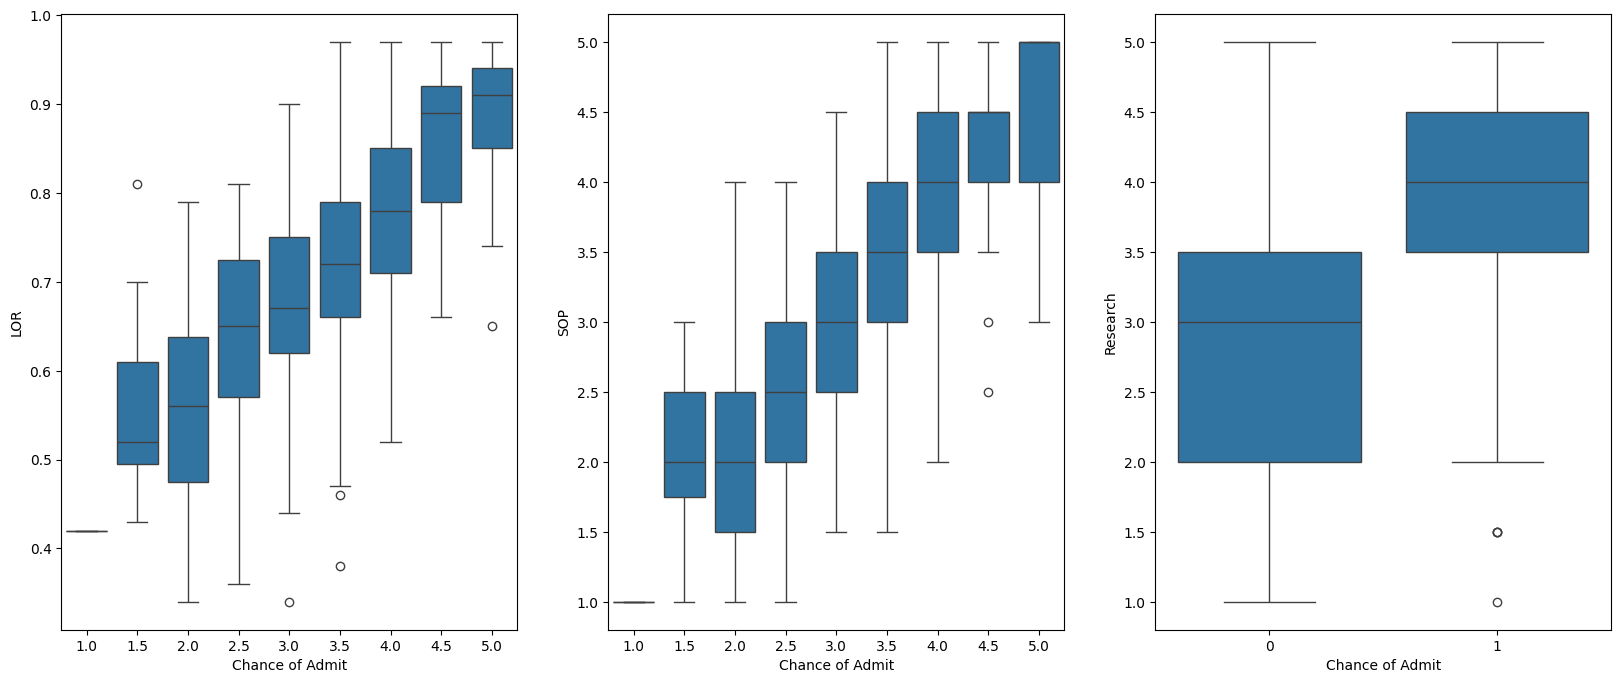

In [8]:
plt.figure(figsize=(20,8))

plt.subplot(131)
sns.boxplot(x=df['LOR'], y=df['Chance of Admit'], whis=1.5)
plt.ylabel("LOR")
plt.xlabel("Chance of Admit")

plt.subplot(132)
sns.boxplot(x=df['LOR'], y=df['SOP'], whis=1.5)
plt.ylabel("SOP")
plt.xlabel("Chance of Admit")

plt.subplot(133)
sns.boxplot(x=df['Research'], y=df['SOP'], whis=1.5)
plt.ylabel("Research")
plt.xlabel("Chance of Admit")

plt.show()

Делим данные и строим модель

In [9]:
df = df.drop(columns='Research')
X = df.drop(columns='Chance of Admit')
Y = df['Chance of Admit']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, random_state=42)

In [10]:
# Да, функцию немного позаимствовал))
def evaluate_preds(true_values, pred_values, test=False, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8, 8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 1], [0, 1], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig('report.png')
    
    if test:
        plt.gcf().set_facecolor('green')
    plt.show()

R2:	0.792
RMSE:	0.063
MSE:	0.004


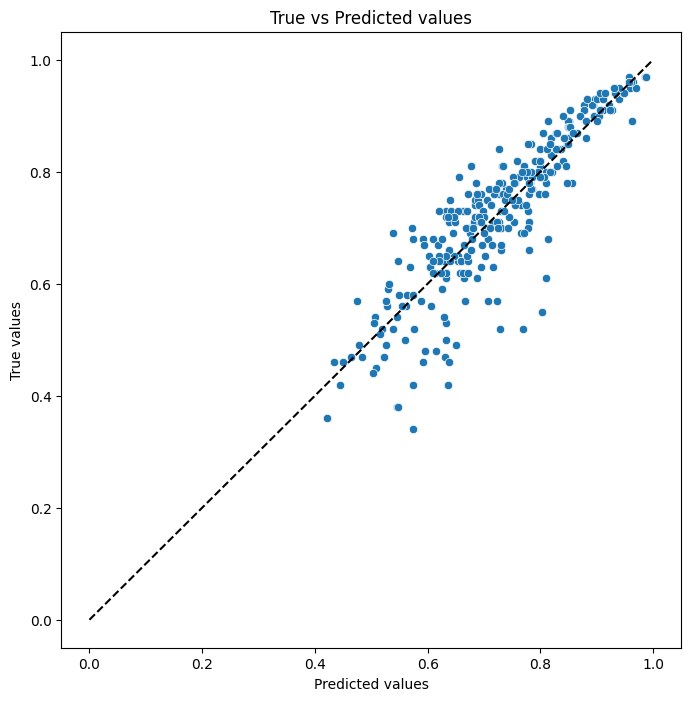

In [11]:
linear = LinearRegression()

linear.fit(X_train, Y_train)

predict_train = linear.predict(X_train)
predict_train = np.clip(predict_train, 0, 1)

evaluate_preds(Y_train, predict_train)

R2:	0.81
RMSE:	0.067
MSE:	0.004


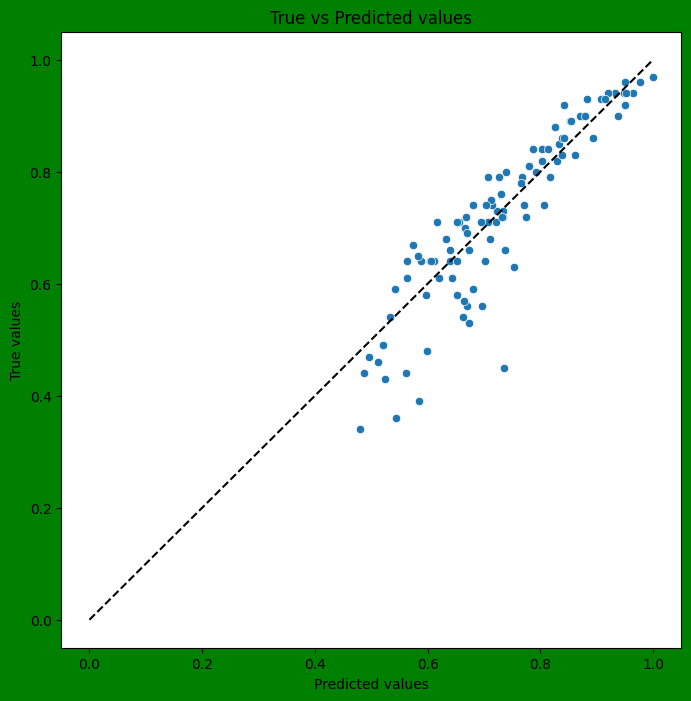

In [12]:
predict_test = linear.predict(X_test)
predict_test = np.clip(predict_test, 0, 1)

evaluate_preds(Y_test, predict_test, True)

Неплохо, но можно попробовать улучшить

R2:	0.792
RMSE:	0.063
MSE:	0.004


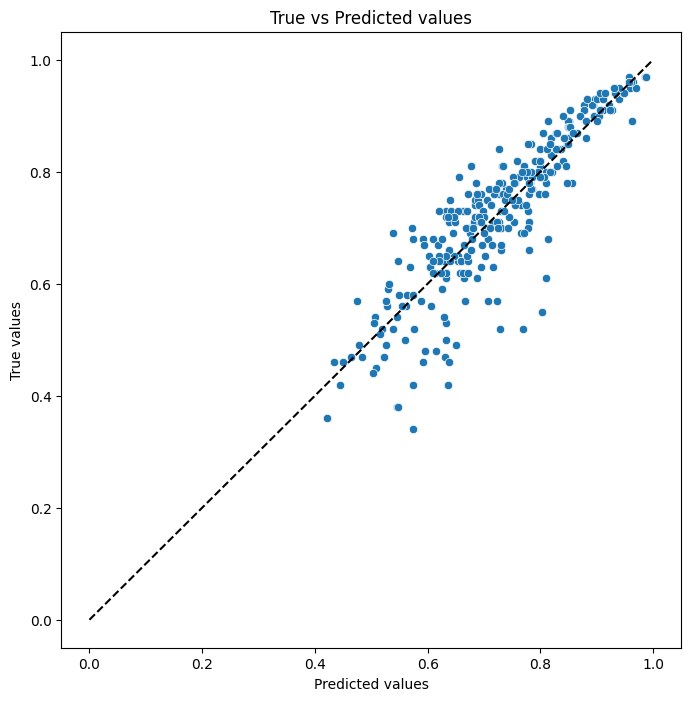

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(
    StandardScaler()
)

pipe.fit(X_train, Y_train)
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)


linear = LinearRegression()

linear.fit(X_train, Y_train)

predict_train = linear.predict(X_train)
predict_train = np.clip(predict_train, 0, 1)

evaluate_preds(Y_train, predict_train)

R2:	0.81
RMSE:	0.067
MSE:	0.004


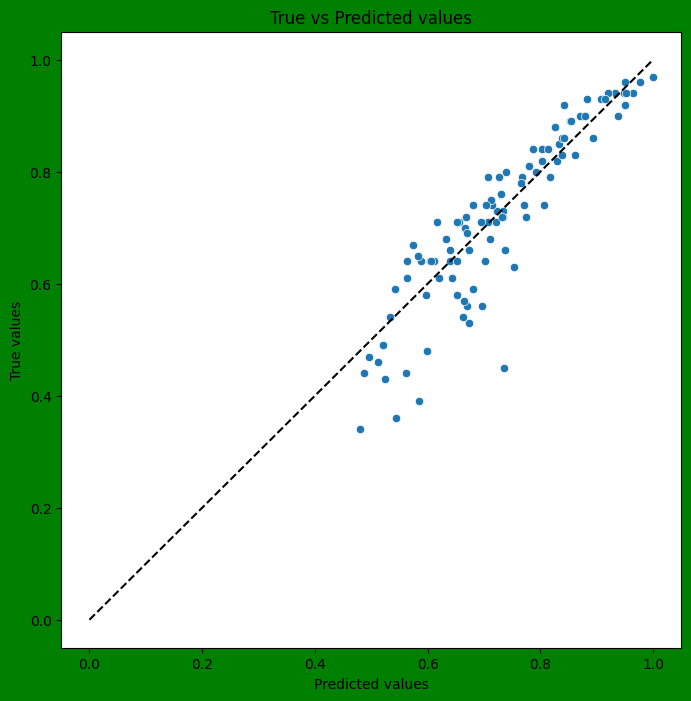

In [14]:
predict_test = linear.predict(X_test)
predict_test = np.clip(predict_test, 0, 1)

evaluate_preds(Y_test, predict_test, True)

Стандартизация особо не помогла

R2:	0.802
RMSE:	0.062
MSE:	0.004


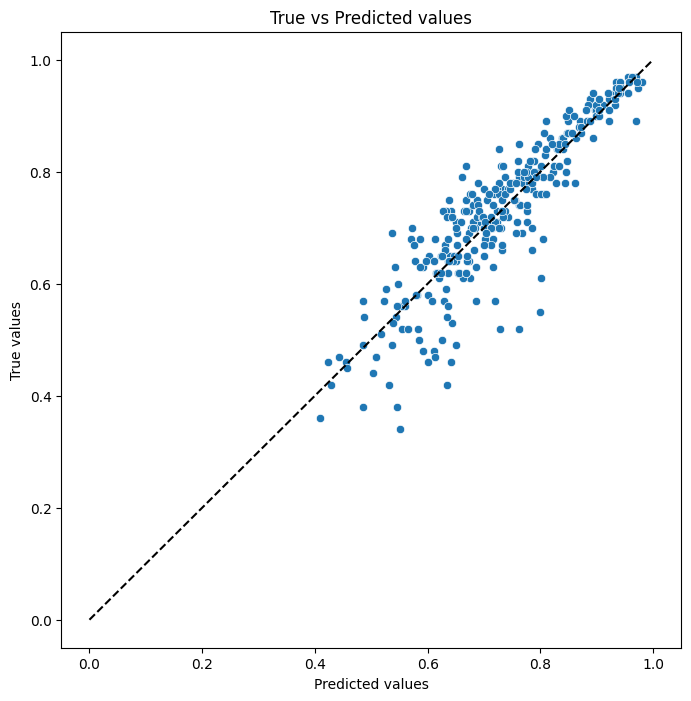

In [15]:
pipe = make_pipeline(
    PolynomialFeatures(interaction_only=True),
    StandardScaler()
)

pipe.fit(X_train, Y_train)
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

linear = LinearRegression()

linear.fit(X_train, Y_train)

predict_train = linear.predict(X_train)
predict_train = np.clip(predict_train, 0, 1)

evaluate_preds(Y_train, predict_train)

R2:	0.825
RMSE:	0.064
MSE:	0.004


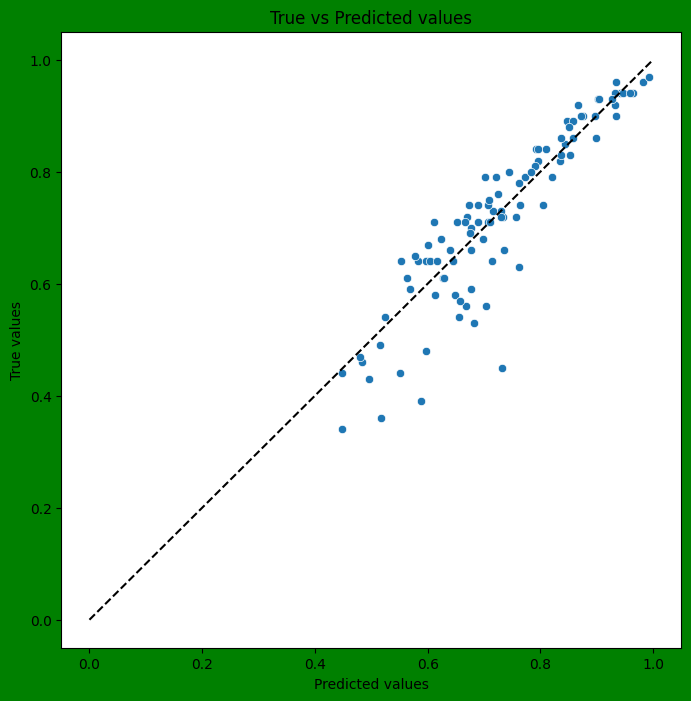

In [16]:
predict_test = linear.predict(X_test)
predict_test = np.clip(predict_test, 0, 1)

evaluate_preds(Y_test, predict_test, True)

In [17]:
with open("linear_model.pkl", 'wb') as filename:
    pickle.dump(linear, filename)

Уже получше, попробуем еще поиграть с полиномами

R2:	0.823
RMSE:	0.058
MSE:	0.003


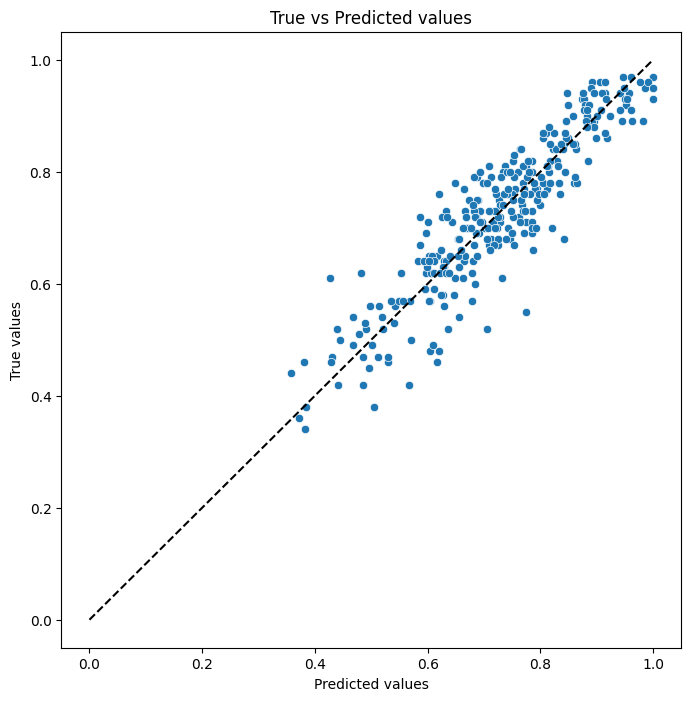

In [18]:
# pipe = make_pipeline(
#     PolynomialFeatures(degree=2),
#     StandardScaler()
# )

# pipe.fit(X_train, Y_train)
# X_train = pipe.transform(X_train)
# X_test = pipe.transform(X_test)

# linear = LinearRegression()

# linear.fit(X_train, Y_train)

# predict_train = linear.predict(X_train)
# predict_train = np.clip(predict_train, 0, 1)

# evaluate_preds(Y_train, predict_train)

R2:	0.287
RMSE:	0.13
MSE:	0.017


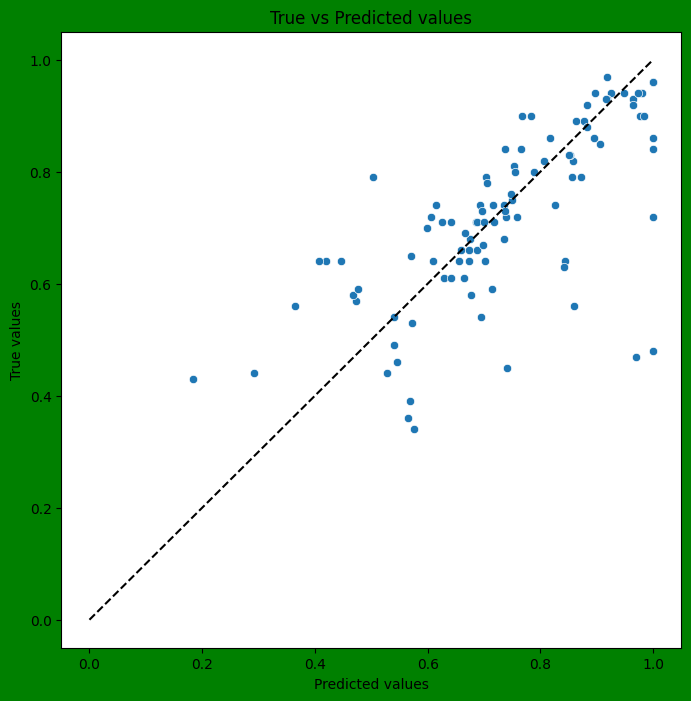

In [19]:
# predict_test = linear.predict(X_test)
# predict_test = np.clip(predict_test, 0, 1)

# evaluate_preds(Y_test, predict_test, True)

Наглядный пример переобучения :)

Таким образом, мы построили модель линейной регрессии. Стандартизация особо не помогла скрасить метрики, увеличение степени в полиномах чуть не сломало мой мак, но так и не помогло улучшить скоры (переобучение). Оптимальной является интерсекция. Есть подозрение, что дерево / анасамбль моделей справились бы куда лучше

R2:	0.863
RMSE:	0.051
MSE:	0.003


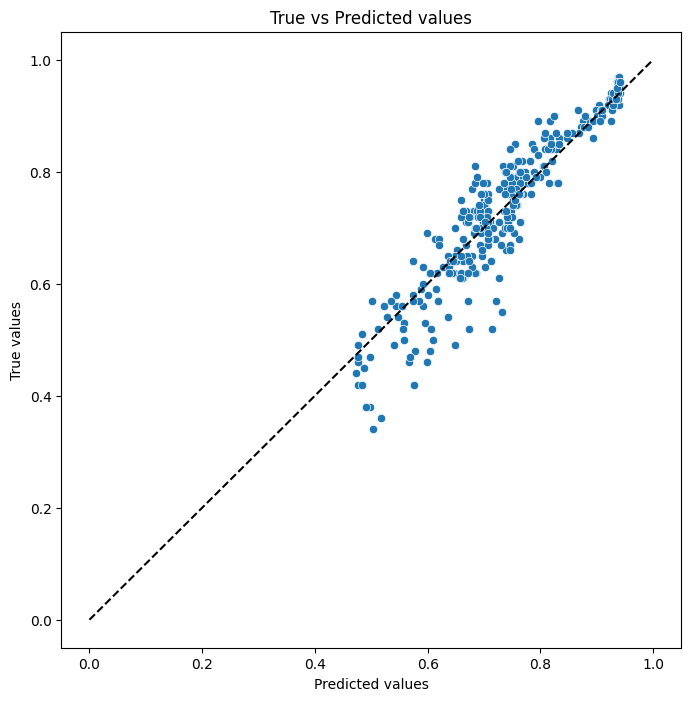

In [26]:
from sklearn.ensemble import RandomForestRegressor

pipe = make_pipeline(
    StandardScaler()
)

pipe.fit(X_train, Y_train)
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

tree = RandomForestRegressor(max_depth=3)

tree.fit(X_train, Y_train)

predict_train = tree.predict(X_train)
predict_train = np.clip(predict_train, 0, 1)

evaluate_preds(Y_train, predict_train)

R2:	0.769
RMSE:	0.074
MSE:	0.005


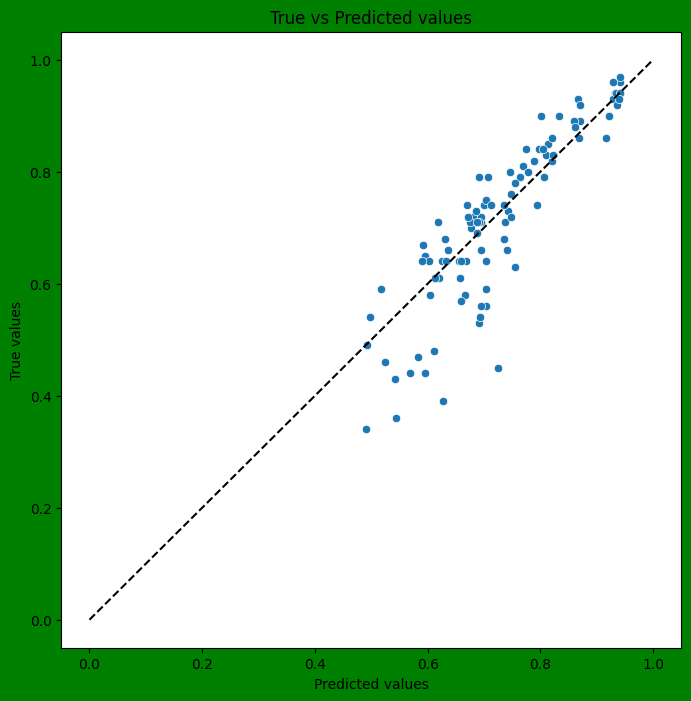

In [27]:
predict_test = tree.predict(X_test)
predict_test = np.clip(predict_test, 0, 1)

evaluate_preds(Y_test, predict_test, True)

Тут на обучении была ситуация лучше. Интересно, что бы сюда подошло....